In [44]:
#@title 1. Montar drive (If you are in in colab){ display-mode: "form" }

import os
from google.colab import drive
path =  "/content/drive/My Drive/Colab Notebooks/Python/Proyectos/20201-ai2-class-project"#@param {type:"string"}
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/Python/Proyectos/20201-ai2-class-project


In [ ]:
#@title 2. Load libraries { display-mode: "form" }
import numpy as np
import pandas as pd 
import sys
import matplotlib.pyplot as plt
from sklearn import datasets
import json
import os
import tensorflow as tf
from tqdm import tqdm
import seaborn as sb
import seaborn as sns
from nltk.corpus import stopwords
import string
from sklearn.preprocessing import LabelEncoder
import nltk
nltk.download('stopwords')
from keras.utils import np_utils


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## 3. Descargar datos

In [7]:
try:
    os.mkdir('data')
except OSError:
    print ("Creation of the directory %s failed")
else:
    print ("Successfully created the directory %s ")
os.chdir('data')
print(os.getcwd())

Successfully created the directory %s 
/content/drive/My Drive/Colab Notebooks/Python/Proyectos/20201-ai2-class-project/data


In [8]:
import os
os.environ['KAGGLE_USERNAME'] = "jamf05" # username from the json file
os.environ['KAGGLE_KEY'] = "33b44029575614b1c82d40d85690cbac" # key from the json file
!kaggle datasets download -d praveengovi/emotions-dataset-for-nlp

  0% 0.00/721k [00:00<?, ?B/s]
100% 721k/721k [00:00<00:00, 46.2MB/s]


>**Nota:** Omitir la descarga si ya tiene el archivo **emotions-dataset-for-nlp.zip**

In [11]:
!unzip 'emotions-dataset-for-nlp.zip'

Archive:  emotions-dataset-for-nlp.zip
  inflating: test.txt                
  inflating: train.txt               
  inflating: val.txt                 


In [12]:
os.chdir(path)
print(os.getcwd())

/content/drive/My Drive/Colab Notebooks/Python/Proyectos/20201-ai2-class-project


## 4. Tratamiento de datos

Procedemos a cargar el dataset y a concatenar para armar el compendio de frases y su respectivo sentimiento. Hay que tener en cuenta que tenemos que analizar y categorizar numericamente los datos de `label`, ademas de secuenciar numericamente (`tokenizar`) mis frases.

In [130]:
df_train = pd.read_csv("data/train.txt", delimiter=';', header=None, names=['sentence','label'])
df_val = pd.read_csv("data/val.txt", delimiter=';',header=None, names=['sentence','label'])
df_test = pd.read_csv("data/test.txt", delimiter=';',header=None, names=['sentence','label'])

df_train.shape,df_val.shape,df_test.shape

((16000, 2), (2000, 2), (2000, 2))

In [131]:
df = pd.concat([df_train,df_test,df_val])
df.shape

(20000, 2)

In [122]:
df_train.head()

,sentence,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


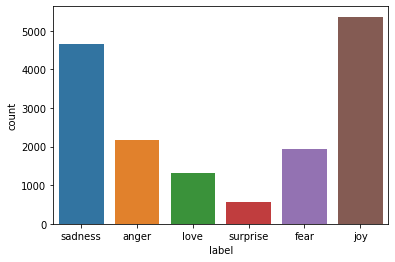

In [123]:
sns.countplot(df_train['label'])

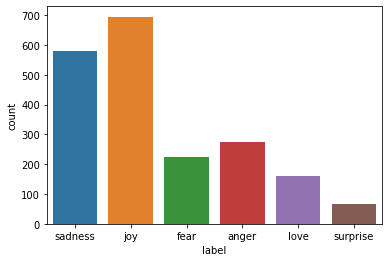

In [125]:
sns.countplot(df_test['label'])

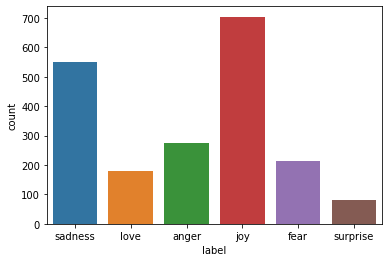

In [126]:
sns.countplot(df_val['label'])

In [127]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    word_seq=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return word_seq

In [132]:
text = df['sentence'].apply(text_process)
text_train = df_train['sentence'].apply(text_process)
text_val = df_val['sentence'].apply(text_process)
text_test = df_test['sentence'].apply(text_process)

In [133]:
text_train

0                                [didnt, feel, humiliated]
1        [go, feeling, hopeless, damned, hopeful, aroun...
2        [im, grabbing, minute, post, feel, greedy, wrong]
3        [ever, feeling, nostalgic, fireplace, know, st...
4                                       [feeling, grouchy]
                               ...                        
15995    [brief, time, beanbag, said, anna, feel, like,...
15996    [turning, feel, pathetic, still, waiting, tabl...
15997                        [feel, strong, good, overall]
15998                [feel, like, rude, comment, im, glad]
15999                   [know, lot, feel, stupid, portray]
Name: sentence, Length: 16000, dtype: object

In [134]:
max_len = 100
max_words = 20000
tokenizer = Tokenizer(num_words=max_words)

tokenizer.fit_on_texts(text)

sequences_train = tokenizer.texts_to_sequences(text_train)
sequences_val = tokenizer.texts_to_sequences(text_val)
sequences_test = tokenizer.texts_to_sequences(text_test)

In [135]:
data_train = pad_sequences(sequences_train,maxlen=max_len)
data_val = pad_sequences(sequences_val,maxlen=max_len)
data_test = pad_sequences(sequences_test,maxlen=max_len)

In [136]:
encode=LabelEncoder()

In [138]:
y_train = encode.fit_transform(df_train['label'])
y_data_train = tf.keras.utils.to_categorical(y_train)
print(y_data_train.shape)

y_val = encode.fit_transform(df_val['label'])
y_data_val = tf.keras.utils.to_categorical(y_val)
print(y_data_val.shape)

y_test = encode.fit_transform(df_test['label'])
y_data_test = tf.keras.utils.to_categorical(y_test)
print(y_data_test.shape)

(16000, 6)
(2000, 6)
(2000, 6)


In [139]:
x_train = data_train
y_train = y_data_train
print("Entrenamiento: ",x_train.shape,y_train.shape)

x_val = data_val
y_val = y_data_val
print("Validacion: ",x_val.shape,y_val.shape)

x_test = data_test
y_test = y_data_test
print("Test: ",x_test.shape,y_test.shape)

Entrenamiento:  (16000, 100) (16000, 6)
Validacion:  (2000, 100) (2000, 6)
Test:  (2000, 100) (2000, 6)


In [141]:
np.save('data/x_train.npy', x_train)
np.save('data/y_train.npy', y_train)
np.save('data/x_val.npy', x_val)
np.save('data/y_val.npy', y_val)
np.save('data/x_test.npy', x_test)
np.save('data/y_test.npy', y_test)

## 5. Referencias

- Sentiment analysis [[++](https://www.kaggle.com/adithyansukumar/sentiment-analysis)]
- Classify Emotions in text with BERT [[++](https://www.kaggle.com/praveengovi/classify-emotions-in-text-with-bert)]
- 
NLP-News [[++](https://www.kaggle.com/dionesiusap/nlp-news)]
- Where can I get an Emotion Dataset which contains phrases and their associated emotions ? [[++](https://www.researchgate.net/post/Where_can_I_get_an_Emotion_Dataset_which_contains_phrases_and_their_associated_emotions)]
- WASSA-2017 Shared Task on Emotion Intensity (EmoInt) [[++](http://saifmohammad.com/WebPages/EmotionIntensity-SharedTask.html)]